# Lab 4 - Polynomial Interpolation (Lagrange and Newton)
## February 20 - February 22, 2023
## Student 1 Name: Dhruv Shah Student 1 ID No. $202103017$
## Student 2 Name: Pranav Patel Student 2 ID No. $202103040$
## Student 3 Name: Vatsal Shah Student 3 ID No. $202103022$
## Date of Submission: $\underline{22/02/23}$
***

In [1]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import math

### Q.1 Write a function `mypolyint` that takes in a $n \times 2$ matrix whose row $i$ contains points $(x_i,y_i)$, and returns coefficients of the polynomial that interpolates the given points, using Lagrange's interpolation. Your function should also plot the graph of the function showing that it does interpolate the given set of points.

In [2]:
###  Lagrange's interpolation ----
### def mypolyint(xy):
def mypolyint(XY):
    pow = np.arange(0,len(XY))
    y = XY[:,1:]
    vand = XY[:,0:1]**pow
    # print(vand)
    coeff = np.linalg.solve(vand,y)
    return coeff

def polyeval (x , coeff):
    eval = [0.0]
    for i in range(len(coeff)):
        eval = eval + coeff[i,0:1] * (x**i)
    return eval

### Q.1(a) Show a few example plots of points $(x_i,y_i),i=1,\ldots,n$ and the interpolating polynomial graph passing through the given points, below

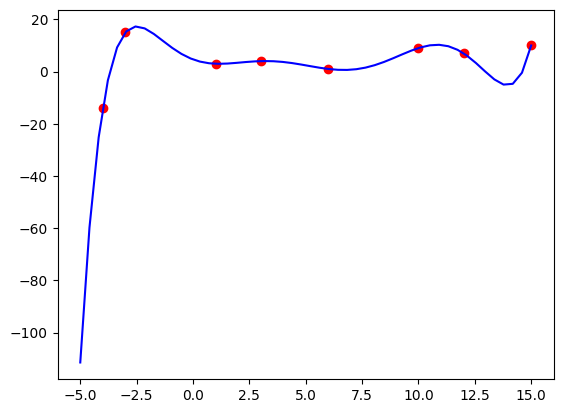

In [3]:
### Generate examples of (x_i,y_i) and plot these points along with values of the interpolating polynomials at 
### these (and several intermediate points).
xy = np.array([[1,3], [3,4], [6,1], [-3, 15], [-4, -14], [15, 10], [10, 9], [12, 7]])
coeff = mypolyint(xy)
# print(coeff)

x = np.linspace(min(xy[:,0:1])-1, max(xy[:,0:1]))
# x = np.linspace(-10,20)
val = polyeval(x, coeff)
# print(val)
plt.scatter(xy[:,0:1], xy[:,1:], color='r')
plt.plot(x, val, color='b')

***
### Q.2: Write a function `mynewtonint` that takes in an $n \times 2$ matrix whose row $i$ contains points $(x_i,y_i)$, and returns coefficient vector of the Newton's polynomial that interpolates the given points. Your function should also plot the graph of the polynomial (at given and several intermediate points) showing that it does interpolate the given set of points.


In [4]:

## iterative method
def evalPn(x, coeff, xy): #method that evaluate the polynomial with the basis 1, (x-x0), (x-x0)(x-1),...
  eval = 0
  for i in range(len(coeff)):
    eval = eval + coeff[i] * wk(x, i, xy)
  return eval


def wk(x, k, xy): #This function computes the values W_k(x)
  wi = 1
  for i in range(k):
    wi = wi * (x - xy[i][0])

  return wi

def kPn(x, coeff, xy): # This function computes the value of P^(k-1)(x)
  evaPol = 0
  k = len(coeff)
  for i in range(k):
    evaPol += coeff[i] * wk(x, i, xy)
    
  return evaPol

#Given a n x 2 matrix it will find the coefficient of the polynomial which passes through the points given in the matrix
def mynewtonint(xy):
  coeff = []

  for i in range(len(xy)):
    xi = xy[i][0]
    yi = xy[i][1]
    term = (yi - kPn(xi, coeff, xy))/wk(xi, i, xy)
    # print(i, wk(xi, i, xy))
    coeff = np.append(coeff, term)

  return coeff

#Given a vector of coefficient and n x 2 matrix of sample point the function will plot the graph ot the polynomial whose cofficients are given in function argument
def plotPn(coeff, xy):
  samplex0 = np.array(xy[  : ,0])
  sampley0 = np.array(xy[  : ,1])
  a = np.min(samplex0)
  b = np.max(samplex0)

  xn = np.linspace(a, b, 100)
  fx = evalPn(xn, coeff, xy)

  plt.scatter(samplex0, sampley0, marker='o')
  plt.plot(xn, fx, color='g')
  plt.show()

Coefficient Vector: [ 3.00000000e+00  5.00000000e-01 -3.00000000e-01 -9.81481481e-02
 -1.09576720e-01  6.15164454e-03 -5.31866568e-04  4.86562014e-05]


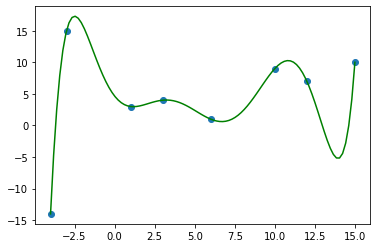

In [67]:
xy = np.array([[1,3], [3,4], [6,1], [-3, 15], [-4, -14], [15, 10], [10, 9], [12, 7]])
cf = mynewtonint(xy)
print('Coefficient Vector:',cf)
plotPn(cf, xy)


### Q.2(a) Show a few example plots of points $(x_i,y_i),i=1,\ldots,n$ and the interpolating polynomial graph passing through the given points, below


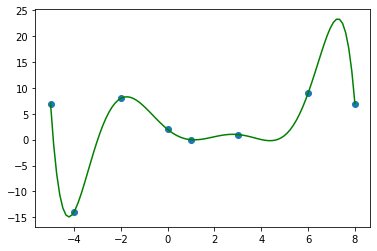

In [68]:
### Write your examples for Q.2 here.
xy2 = np.array([[1,0], [0,2], [3,1], [-2, 8], [-4, -14], [8,7], [6, 9], [-5, 7]])
# print(xy2)
cf2 = mynewtonint(xy2)
plotPn(cf2, xy2)

***
### Q.3 For the function $f(x) = \sqrt{x}$, let $f_n(x)$ denote the Newton's polynomial constructed by interpolating $n+1$ equi-spaced sampled points from the interval $[0,4]$. Plot the functions $f,f_2,f_4,f_8,f_{16},f_{32}$, and in another figure plot the error function $e(x) = f(x)-f_n(x)$ by sampling the error function on $1000$ equi-spaced points in the interval $[0,4]$. Find the maximum error $E_n = \max_{1\leq k \leq 1000} \{|f(x_k) - f_n(x_k)|\}$, and plot it with respect to $n$. Record your observations.


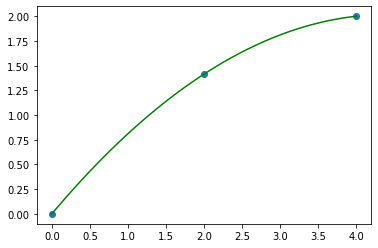

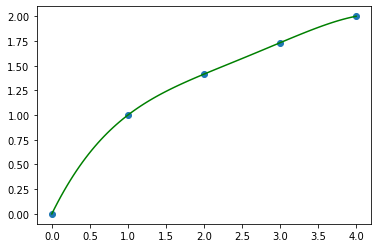

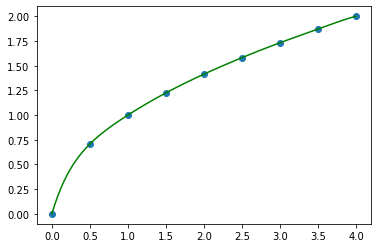

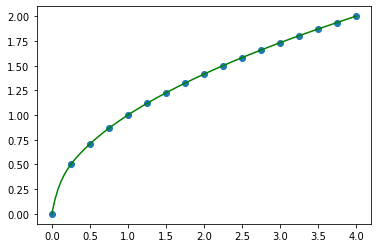

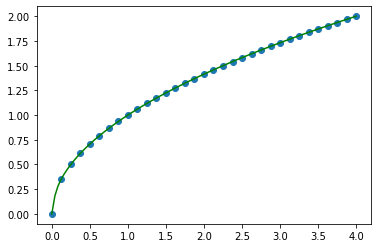

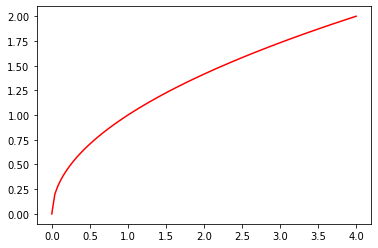

In [71]:
## Write your code for Q.3 here
# defining the function f(x)
def fx(x):
  return math.sqrt(x)
fx = np.vectorize(fx)

#generating equi-spaced sampled points in given interval
def gsp(a, b, n): #here n denotes the suffix of the function f_n(x)
  return np.linspace(a, b, n+1)


i = 2
while(i < 64):
  points = np.array(gsp(0, 4, i))
  # print(points)
  fpoints = fx(points)
  # print(fpoints)
  xy = np.column_stack((points, fpoints))
  # print(xy)
  f2 = mynewtonint(xy)
  plotPn(f2, xy)

  i = i * 2

plt.plot(gsp(0, 4, 100), fx(gsp(0, 4, 100)), color = 'r')

In [80]:
# Take 1000 equi-spaced points from 0 to 4
x = np.array(gsp(0, 4, 1000))
y = np.array(fx(x))

xy1000 = np.column_stack((x,y))
# print(xy1000.shape)
coeff1000 = mynewtonint(xy1000)

def f1000(x, coeff1000, xy):
  return evalPn(x, coeff1000, xy)

def e(x, coeff1000, xy1000):
  return np.abs(fx(x) - f1000(x, coeff1000, xy1000))

error = e(x, coeff1000, xy1000)
# plotPn(coeff1000, xy1000)

<ipython-input-66-87d4240e6258>:31: RuntimeWarning: overflow encountered in double_scalars
  term = (yi - kPn(xi, coeff, xy))/wk(xi, i, xy)
<ipython-input-66-87d4240e6258>:20: RuntimeWarning: invalid value encountered in double_scalars
  evaPol += coeff[i] * wk(x, i, xy)
<ipython-input-66-87d4240e6258>:20: RuntimeWarning: overflow encountered in double_scalars
  evaPol += coeff[i] * wk(x, i, xy)
<ipython-input-66-87d4240e6258>:5: RuntimeWarning: overflow encountered in multiply
  eval = eval + coeff[i] * wk(x, i, xy)
<ipython-input-66-87d4240e6258>:5: RuntimeWarning: invalid value encountered in add
  eval = eval + coeff[i] * wk(x, i, xy)
<ipython-input-66-87d4240e6258>:5: RuntimeWarning: invalid value encountered in multiply
  eval = eval + coeff[i] * wk(x, i, xy)


In [81]:
print(error)

[nan nan nan ... nan nan nan]


### <font color="red"> Ans 3. Write your observations here <font>
### Here we observe that at while calculating the Newtons Divided Difference coefficients for 1000 points, overflow occurs while calculating. This is because of the fact that multiplication of $w^k(x) = \Pi_{i=0}^k (x - x_i)$ at some $k$ will result in a very large number or a very small number leading to the subsequent errors in computation.

### Thus, when we take less number of points, we get values which are within the computational capacity of the double precision. So, as we did previously, we can plot the $e(x)$ for some other examples below. 



Maximum error is  4.056481920730334e+31


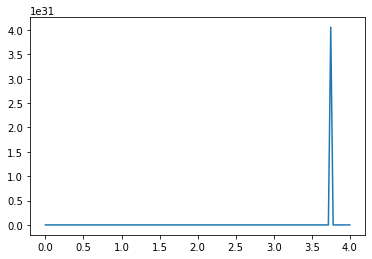

In [83]:
x = np.array(gsp(0, 4, 128))
y = np.array(fx(x))
xy128 = np.column_stack((x,y))
coeff128 = mynewtonint(xy128)
error = e(x, coeff128, xy128)
print("Maximum error is ", max(error))
plt.plot(gsp(0, 4, 128), error)
# plotPn(coeff128, error)